In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
game_results_big10_2023 = pd.read_csv('../data/game_results_big10_2023.csv')
betting_lines_big10_2023 = pd.read_csv('../data/betting_lines_big10_2023.csv')
team_recruiting_rankings_2023 = pd.read_csv('../data/team_recruiting_rankings_2023.csv')
team_talent_composite_ranking_2023 = pd.read_csv('../data/team_talent_composite_ranking_2023.csv')
team_stats_big10_2023 = pd.read_csv('../data/team_stats_big10_2023.csv')

In [3]:
game_results_big10_2023['Home_Minus_Away_Points'] = game_results_big10_2023['Home Points'] - game_results_big10_2023['Away Points']
game_results_big10_2023['Home_Team_Win'] = game_results_big10_2023['Home_Minus_Away_Points'] > 0

In [4]:
game_results_big10_2023.head().iloc[:,0:20]

,Id,Season,Week,Season Type,Start Date,Start Time Tbd,Completed,Neutral Site,Conference Game,Attendance,Venue Id,Venue,Home Id,Home Team,Home Conference,Home Division,Home Points,Home Line Scores[0],Home Line Scores[1],Home Line Scores[2]
0,401520148,2023,1,regular,2023-09-01T00:00:00.000Z,False,True,False,True,53629.0,3953,TCF Bank Stadium,135,Minnesota,Big Ten,fbs,13,0,3,0
1,401520163,2023,1,regular,2023-09-01T23:00:00.000Z,False,True,False,False,NaN,3936,Spartan Stadium,127,Michigan State,Big Ten,fbs,31,0,10,7
2,401520170,2023,1,regular,2023-09-02T16:00:00.000Z,False,True,False,False,54898.0,3907,Ross-Ade Stadium,2509,Purdue,Big Ten,fbs,35,7,14,7
3,401520162,2023,1,regular,2023-09-02T16:00:00.000Z,False,True,False,False,109480.0,3558,Michigan Stadium,130,Michigan,Big Ten,fbs,30,7,16,7
4,401520157,2023,1,regular,2023-09-02T16:00:00.000Z,False,True,False,False,69250.0,3793,Kinnick Stadium,2294,Iowa,Big Ten,fbs,24,14,3,0


In [5]:
game_results_big10_2023.shape

(106, 41)

In [6]:
game_results_big10_2023.head().iloc[:,20:]

,Home Line Scores[3],Home Post Win Prob,Home Pregame Elo,Home Postgame Elo,Away Id,Away Team,Away Conference,Away Division,Away Points,Away Line Scores[0],...,Away Line Scores[2],Away Line Scores[3],Away Post Win Prob,Away Pregame Elo,Away Postgame Elo,Excitement Index,Highlights,Notes,Home_Minus_Away_Points,Home_Team_Win
0,10,0.047056,1672,1671,158,Nebraska,Big Ten,fbs,10,0,...,7,3,0.952944,1521.0,1522.0,7.656758,NaN,NaN,3,True
1,14,0.989833,1533,1575,2117,Central Michigan,Mid-American,fbs,7,0,...,0,0,0.010167,1370.0,1328.0,6.660548,NaN,NaN,24,True
2,7,0.125611,1473,1479,278,Fresno State,Mountain West,fbs,39,7,...,8,14,0.874389,1677.0,1671.0,6.896309,NaN,NaN,-4,False
3,0,0.998549,1916,1941,151,East Carolina,American Athletic,fbs,3,0,...,0,3,0.001451,1506.0,1481.0,1.172112,NaN,NaN,27,True
4,7,0.890762,1665,1664,328,Utah State,Mountain West,fbs,14,0,...,3,8,0.109238,1395.0,1396.0,4.699575,NaN,NaN,10,True


In [7]:
betting_lines_big10_2023.head()

,Id,HomeTeam,HomeScore,AwayTeam,AwayScore,LineProvider,OverUnder,Spread,FormattedSpread,OpeningSpread,OpeningOverUnder,HomeMoneyline,AwayMoneyline
0,401520340,Michigan State,0,Michigan,49,William Hill (New Jersey),46.5,25.5,Michigan -25.5,NaN,NaN,NaN,NaN
1,401520340,Michigan State,0,Michigan,49,DraftKings,46.0,24.5,Michigan -24.5,19.0,NaN,1700.0,-4500.0
2,401520340,Michigan State,0,Michigan,49,Bovada,47.0,25.5,Michigan -25.5,17.0,47.5,1100.0,-2800.0
3,401520343,Ohio State,20,Penn State,12,William Hill (New Jersey),46.5,-4.0,Ohio State -4,NaN,NaN,NaN,NaN
4,401520343,Ohio State,20,Penn State,12,DraftKings,45.5,-4.0,Ohio State -4,-10.0,NaN,-192.0,160.0


In [8]:
betting_lines_big10_2023.shape

(315, 13)

In [9]:
betting_lines_big10_2023[betting_lines_big10_2023['LineProvider']=='DraftKings']

,Id,HomeTeam,HomeScore,AwayTeam,AwayScore,LineProvider,OverUnder,Spread,FormattedSpread,OpeningSpread,OpeningOverUnder,HomeMoneyline,AwayMoneyline
1,401520340,Michigan State,0,Michigan,49,DraftKings,46.0,24.5,Michigan -24.5,19.0,NaN,1700.0,-4500.0
4,401520343,Ohio State,20,Penn State,12,DraftKings,45.5,-4.0,Ohio State -4,-10.0,NaN,-192.0,160.0
7,401520336,Illinois,21,Wisconsin,25,DraftKings,40.5,3.0,Wisconsin -3,5.0,43.0,130.0,-155.0
10,401520301,Illinois,7,Nebraska,20,DraftKings,43.0,-3.5,Illinois -3.5,-3.0,44.5,-155.0,142.0
13,401520338,Iowa,10,Minnesota,12,DraftKings,30.5,-3.5,Iowa -3.5,-5.5,32.5,-166.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,401520392,Nebraska,10,Maryland,13,DraftKings,NaN,1.0,Maryland -1,1.0,NaN,102.0,-122.0
304,401520394,Penn State,15,Michigan,24,DraftKings,NaN,6.5,Michigan -6.5,2.0,NaN,160.0,-192.0
307,401520393,Ohio State,38,Michigan State,3,DraftKings,NaN,-30.5,Ohio State -30.5,-25.5,NaN,-20000.0,3500.0
310,401520194,Iowa State,13,Iowa,20,DraftKings,36.0,3.5,Iowa -3.5,4.0,36.5,150.0,-175.0


In [10]:
team_recruiting_rankings_2023.head()

,Year,Rank,Team,Points
0,2023,1,Alabama,328.00
1,2023,2,Georgia,315.68
2,2023,3,Texas,306.31
3,2023,4,Oklahoma,289.03
4,2023,5,Ohio State,288.98


In [11]:
team_talent_composite_ranking_2023.head()

,Year,School,Talent
0,2023,Alabama,1015.43
1,2023,Georgia,977.87
2,2023,Ohio State,974.79
3,2023,Texas A&M,925.92
4,2023,Clemson,917.88


In [12]:
team_stats_big10_2023.head()

,Game Id,School,Conference,HomeAway,Points,Stat Category,Stat
0,401520365,Wisconsin,Big Ten,away,14,rushingTDs,0
1,401520365,Wisconsin,Big Ten,away,14,puntReturnYards,29
2,401520365,Wisconsin,Big Ten,away,14,puntReturnTDs,0
3,401520365,Wisconsin,Big Ten,away,14,puntReturns,4
4,401520365,Wisconsin,Big Ten,away,14,passingTDs,2


In [13]:
team_stats_big10_2023_pivoted = team_stats_big10_2023.pivot(index= ['Game Id', 'School', 'HomeAway'], columns='Stat Category', values='Stat').reset_index()
team_stats_big10_2023_pivoted.head().iloc[:,0:20]

Stat Category,Game Id,School,HomeAway,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,kickReturnYards,kickReturns,kickingPoints,netPassingYards,passesDeflected,passesIntercepted,passingTDs
0,401520148,Minnesota,home,24-44,0,20,2-2,0,1,0,14,1,0,49,3,7,196,3,3,1
1,401520148,Nebraska,away,11-19,0,18,0-0,1,0,0,0,3,0,78,2,4,114,4,1,1
2,401520155,Illinois,home,18-26,1,21,2-3,0,0,1,48,1,0,77,5,6,206,3,1,2
3,401520155,Toledo,away,20-37,0,27,2-2,0,0,0,0,1,0,61,4,10,230,3,1,2
4,401520156,Indiana,home,9-20,0,8,0-2,0,0,0,11,0,0,38,3,3,82,8,1,0


In [14]:
team_stats_big10_2023_pivoted.head().iloc[:,20:]

Stat Category,possessionTime,puntReturnTDs,puntReturnYards,puntReturns,qbHurries,rushingAttempts,rushingTDs,rushingYards,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,30:42,0,10,1,5,25,0,55,3,38,5,8-17,0,3-25,251,1,4.5,2.2
1,29:18,0,8,2,3,37,0,181,3,36,5,5-11,1,7-55,295,4,6.0,4.9
2,27:03,NaN,NaN,NaN,1,35,1,168,1,50,5,2-8,NaN,10-100,374,1,7.9,4.8
3,32:57,0,4,1,2,42,1,186,2,44,4,7-15,2,7-40,416,1,6.2,4.4
4,28:05,0,51,2,0,33,0,71,0,41,5,4-15,NaN,8-75,153,0,4.1,2.2


In [15]:
team_stats_big10_2023_pivoted.columns

Index(['Game Id', 'School', 'HomeAway', 'completionAttempts', 'defensiveTDs',
       'firstDowns', 'fourthDownEff', 'fumblesLost', 'fumblesRecovered',
       'interceptionTDs', 'interceptionYards', 'interceptions',
       'kickReturnTDs', 'kickReturnYards', 'kickReturns', 'kickingPoints',
       'netPassingYards', 'passesDeflected', 'passesIntercepted', 'passingTDs',
       'possessionTime', 'puntReturnTDs', 'puntReturnYards', 'puntReturns',
       'qbHurries', 'rushingAttempts', 'rushingTDs', 'rushingYards', 'sacks',
       'tackles', 'tacklesForLoss', 'thirdDownEff', 'totalFumbles',
       'totalPenaltiesYards', 'totalYards', 'turnovers', 'yardsPerPass',
       'yardsPerRushAttempt'],
      dtype='object', name='Stat Category')

In [16]:
team_stat_float_columns = ['defensiveTDs',
       'firstDowns', 'fumblesLost', 'fumblesRecovered',
       'interceptionTDs', 'interceptionYards', 'interceptions',
       'kickReturnTDs', 'kickReturnYards', 'kickReturns', 'kickingPoints',
       'netPassingYards', 'passesDeflected', 'passesIntercepted', 'passingTDs',
        'puntReturnTDs', 'puntReturnYards', 'puntReturns',
       'qbHurries', 'rushingAttempts', 'rushingTDs', 'rushingYards', 'sacks',
       'tackles', 'tacklesForLoss', 'totalFumbles',
       'totalYards', 'turnovers', 'yardsPerPass',
       'yardsPerRushAttempt']
team_stat_nonfloat_stat_columns = ['HomeAway','completionAttempts', 'fourthDownEff', 'possessionTime', 'thirdDownEff', 'totalPenaltiesYards']
for col in team_stat_float_columns:
    team_stats_big10_2023_pivoted[col] = team_stats_big10_2023_pivoted[col].astype('float64')
team_stats_big10_2023_pivoted.dtypes

Stat Category
Game Id                  int64
School                  object
HomeAway                object
completionAttempts      object
defensiveTDs           float64
firstDowns             float64
fourthDownEff           object
fumblesLost            float64
fumblesRecovered       float64
interceptionTDs        float64
interceptionYards      float64
interceptions          float64
kickReturnTDs          float64
kickReturnYards        float64
kickReturns            float64
kickingPoints          float64
netPassingYards        float64
passesDeflected        float64
passesIntercepted      float64
passingTDs             float64
possessionTime          object
puntReturnTDs          float64
puntReturnYards        float64
puntReturns            float64
qbHurries              float64
rushingAttempts        float64
rushingTDs             float64
rushingYards           float64
sacks                  float64
tackles                float64
tacklesForLoss         float64
thirdDownEff            o

In [17]:
#home_team_stats_big10_2023 = team_stats_big10_2023_pivoted[team_stats_big10_2023_pivoted['HomeAway']=='home'].copy()
#.add_prefix('Home_').rename(columns = {'Home_Game Id':'Game Id', 'Home_School':'HomeTeam', 'Home_HomeAway':'HomeAway'}).drop(columns=['HomeAway'])


In [18]:
home_team_stats_big10_2023 = team_stats_big10_2023_pivoted[team_stats_big10_2023_pivoted['HomeAway']=='home'].reset_index().drop(columns='index').copy()
away_team_stats_big10_2023 = team_stats_big10_2023_pivoted[team_stats_big10_2023_pivoted['HomeAway']=='away'].reset_index().drop(columns='index').copy()
#.add_prefix('Away_').rename(columns = {'Away_Game Id':'Game Id', 'Away_School':'AwayTeam', 'Away_HomeAway':'HomeAway'}).drop(columns=['HomeAway'])

team_stats_big10_2023_home_minus_away =  home_team_stats_big10_2023.copy()
for col in team_stat_float_columns:
    team_stats_big10_2023_home_minus_away[col] = home_team_stats_big10_2023[col].subtract(away_team_stats_big10_2023[col], fill_value=0).copy()
#home_team_stats_big10_2023.sub(away_team_stats_big10_2023, fill_value=0)

# home_team_stats_big10_2023 = home_team_stats_big10_2023.drop(columns=['HomeAway']).add_prefix('Home_').rename(columns = {'Home_Game Id':'Id', 'Home_School':'HomeTeam'}).copy()
# away_team_stats_big10_2023 = away_team_stats_big10_2023.drop(columns=['HomeAway']).add_prefix('Away_').rename(columns = {'Away_Game Id':'Id', 'Away_School':'AwayTeam'}).copy()
home_team_stats_big10_2023 = home_team_stats_big10_2023.drop(columns=['HomeAway']).rename(columns = {'Game Id':'Id', 'School':'Team'}).copy()
away_team_stats_big10_2023 = away_team_stats_big10_2023.drop(columns=['HomeAway']).rename(columns = {'Game Id':'Id', 'School':'Team'}).copy()
team_stats_big10_2023_home_minus_away = team_stats_big10_2023_home_minus_away.drop(columns=team_stat_nonfloat_stat_columns).add_prefix('Home_Minus_Away_').rename(columns = {'Home_Minus_Away_Game Id':'Id', 'Home_Minus_Away_School':'HomeTeam'}).copy()
#NOTE: team_stat_nonfloat_stat_columns may need to be adjusted if any of those columns are desired to be subtracted later

team_stats_big10_2023_home_minus_away.head()

Stat Category,Id,HomeTeam,Home_Minus_Away_defensiveTDs,Home_Minus_Away_firstDowns,Home_Minus_Away_fumblesLost,Home_Minus_Away_fumblesRecovered,Home_Minus_Away_interceptionTDs,Home_Minus_Away_interceptionYards,Home_Minus_Away_interceptions,Home_Minus_Away_kickReturnTDs,...,Home_Minus_Away_rushingTDs,Home_Minus_Away_rushingYards,Home_Minus_Away_sacks,Home_Minus_Away_tackles,Home_Minus_Away_tacklesForLoss,Home_Minus_Away_totalFumbles,Home_Minus_Away_totalYards,Home_Minus_Away_turnovers,Home_Minus_Away_yardsPerPass,Home_Minus_Away_yardsPerRushAttempt
0,401520148,Minnesota,0.0,2.0,-1.0,1.0,0.0,14.0,-2.0,0.0,...,0.0,-126.0,0.0,2.0,0.0,-1.0,-44.0,-3.0,-1.5,-2.7
1,401520155,Illinois,1.0,-6.0,0.0,0.0,1.0,48.0,0.0,0.0,...,0.0,-18.0,-1.0,6.0,1.0,-2.0,-42.0,0.0,1.7,0.4
2,401520156,Indiana,0.0,-14.0,0.0,0.0,0.0,11.0,-1.0,0.0,...,-2.0,-72.0,-1.0,7.0,-1.0,NaN,-227.0,-1.0,-2.5,-2.4
3,401520157,Iowa,0.0,-2.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,1.0,-28.0,0.0,-3.0,-5.0,2.0,-45.0,-1.0,1.5,-2.4
4,401520161,Maryland,0.0,14.0,0.0,0.0,NaN,NaN,0.0,0.0,...,2.0,18.0,1.0,-4.0,0.0,NaN,173.0,0.0,2.5,0.2


In [19]:
home_team_stats_big10_2023.head()

Stat Category,Id,Team,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401520148,Minnesota,24-44,0.0,20.0,2-2,0.0,1.0,0.0,14.0,...,3.0,38.0,5.0,8-17,0.0,3-25,251.0,1.0,4.5,2.2
1,401520155,Illinois,18-26,1.0,21.0,2-3,0.0,0.0,1.0,48.0,...,1.0,50.0,5.0,2-8,NaN,10-100,374.0,1.0,7.9,4.8
2,401520156,Indiana,9-20,0.0,8.0,0-2,0.0,0.0,0.0,11.0,...,0.0,41.0,5.0,4-15,NaN,8-75,153.0,0.0,4.1,2.2
3,401520157,Iowa,18-33,0.0,17.0,1-2,0.0,0.0,0.0,0.0,...,1.0,41.0,4.0,6-17,2.0,7-50,284.0,0.0,5.9,2.4
4,401520161,Maryland,26-43,0.0,30.0,2-2,0.0,0.0,NaN,NaN,...,2.0,41.0,3.0,7-14,NaN,6-54,449.0,0.0,6.6,4.6


In [20]:
away_team_stats_big10_2023.head()

Stat Category,Id,Team,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401520148,Nebraska,11-19,0.0,18.0,0-0,1.0,0.0,0.0,0.0,...,3.0,36.0,5.0,5-11,1.0,7-55,295.0,4.0,6.0,4.9
1,401520155,Toledo,20-37,0.0,27.0,2-2,0.0,0.0,0.0,0.0,...,2.0,44.0,4.0,7-15,2.0,7-40,416.0,1.0,6.2,4.4
2,401520156,Ohio State,21-36,0.0,22.0,2-3,0.0,0.0,NaN,NaN,...,1.0,34.0,6.0,2-12,NaN,5-41,380.0,1.0,6.6,4.6
3,401520157,Utah State,32-48,0.0,19.0,1-3,0.0,0.0,NaN,NaN,...,1.0,44.0,9.0,5-17,NaN,10-91,329.0,1.0,4.4,4.8
4,401520161,Towson,16-31,0.0,16.0,1-3,0.0,0.0,NaN,NaN,...,1.0,45.0,3.0,5-15,NaN,10-90,276.0,0.0,4.1,4.4


In [21]:
team_stats_results_big10_2023 = pd.merge(game_results_big10_2023,team_stats_big10_2023_home_minus_away, on=['Id'], how='inner')
team_stats_results_big10_2023.head()

,Id,Season,Week,Season Type,Start Date,Start Time Tbd,Completed,Neutral Site,Conference Game,Attendance,...,Home_Minus_Away_rushingTDs,Home_Minus_Away_rushingYards,Home_Minus_Away_sacks,Home_Minus_Away_tackles,Home_Minus_Away_tacklesForLoss,Home_Minus_Away_totalFumbles,Home_Minus_Away_totalYards,Home_Minus_Away_turnovers,Home_Minus_Away_yardsPerPass,Home_Minus_Away_yardsPerRushAttempt
0,401520148,2023,1,regular,2023-09-01T00:00:00.000Z,False,True,False,True,53629.0,...,0.0,-126.0,0.0,2.0,0.0,-1.0,-44.0,-3.0,-1.5,-2.7
1,401520163,2023,1,regular,2023-09-01T23:00:00.000Z,False,True,False,False,NaN,...,2.0,4.0,1.0,-2.0,3.0,NaN,187.0,-1.0,4.7,1.1
2,401520170,2023,1,regular,2023-09-02T16:00:00.000Z,False,True,False,False,54898.0,...,1.0,-7.0,2.0,18.0,0.0,1.0,-124.0,-1.0,0.3,0.5
3,401520162,2023,1,regular,2023-09-02T16:00:00.000Z,False,True,False,False,109480.0,...,1.0,19.0,0.0,-11.0,-1.0,1.0,167.0,-1.0,4.4,-0.1
4,401520157,2023,1,regular,2023-09-02T16:00:00.000Z,False,True,False,False,69250.0,...,1.0,-28.0,0.0,-3.0,-5.0,2.0,-45.0,-1.0,1.5,-2.4


In [22]:
team_stats_results_big10_2023_nonobjects = team_stats_results_big10_2023.select_dtypes(exclude='object')
team_stats_results_big10_2023_nonobjects.columns
# team_stats_results_big10_2023_nonobjects 

Index(['Id', 'Season', 'Week', 'Start Time Tbd', 'Completed', 'Neutral Site',
       'Conference Game', 'Attendance', 'Venue Id', 'Home Id', 'Home Points',
       'Home Line Scores[0]', 'Home Line Scores[1]', 'Home Line Scores[2]',
       'Home Line Scores[3]', 'Home Post Win Prob', 'Home Pregame Elo',
       'Home Postgame Elo', 'Away Id', 'Away Points', 'Away Line Scores[0]',
       'Away Line Scores[1]', 'Away Line Scores[2]', 'Away Line Scores[3]',
       'Away Post Win Prob', 'Away Pregame Elo', 'Away Postgame Elo',
       'Excitement Index', 'Highlights', 'Home_Minus_Away_Points',
       'Home_Team_Win', 'Home_Minus_Away_defensiveTDs',
       'Home_Minus_Away_firstDowns', 'Home_Minus_Away_fumblesLost',
       'Home_Minus_Away_fumblesRecovered', 'Home_Minus_Away_interceptionTDs',
       'Home_Minus_Away_interceptionYards', 'Home_Minus_Away_interceptions',
       'Home_Minus_Away_kickReturnTDs', 'Home_Minus_Away_kickReturnYards',
       'Home_Minus_Away_kickReturns', 'Home_Minus_Aw

In [23]:
team_stats_results_big10_2023.select_dtypes(exclude='object').corr().iloc[29:,29:]

,Home_Minus_Away_Points,Home_Team_Win,Home_Minus_Away_defensiveTDs,Home_Minus_Away_firstDowns,Home_Minus_Away_fumblesLost,Home_Minus_Away_fumblesRecovered,Home_Minus_Away_interceptionTDs,Home_Minus_Away_interceptionYards,Home_Minus_Away_interceptions,Home_Minus_Away_kickReturnTDs,...,Home_Minus_Away_rushingTDs,Home_Minus_Away_rushingYards,Home_Minus_Away_sacks,Home_Minus_Away_tackles,Home_Minus_Away_tacklesForLoss,Home_Minus_Away_totalFumbles,Home_Minus_Away_totalYards,Home_Minus_Away_turnovers,Home_Minus_Away_yardsPerPass,Home_Minus_Away_yardsPerRushAttempt
Home_Minus_Away_Points,1.000000,0.783386,0.398849,0.732200,-0.176350,0.211258,0.363222,0.482550,-0.403071,3.800748e-02,...,0.825617,0.652360,0.474890,-0.443221,0.479144,-0.224889,0.823535,-0.405351,0.700413,0.624321
Home_Team_Win,0.783386,1.000000,0.237090,0.491128,-0.245763,0.265656,0.266820,0.396672,-0.407520,-7.769310e-02,...,0.654095,0.514291,0.341690,-0.341897,0.297533,-0.289957,0.598120,-0.453260,0.566092,0.436135
Home_Minus_Away_defensiveTDs,0.398849,0.237090,1.000000,0.117790,0.093011,-0.058004,0.817732,0.520112,-0.269179,3.504028e-01,...,0.259970,0.115617,0.088469,-0.013278,0.245022,-0.009204,0.179413,-0.135407,0.319377,0.132661
Home_Minus_Away_firstDowns,0.732200,0.491128,0.117790,1.000000,0.021003,0.000414,0.130819,0.193780,-0.055036,-1.243719e-01,...,0.603109,0.611642,0.370063,-0.715941,0.294739,0.065308,0.867038,-0.026323,0.503027,0.506377
Home_Minus_Away_fumblesLost,-0.176350,-0.245763,0.093011,0.021003,1.000000,-0.980013,0.093877,0.018461,0.065821,-5.682554e-02,...,-0.113546,-0.106979,-0.037323,0.050318,-0.032074,0.784693,0.016668,0.691472,0.128027,-0.112474
Home_Minus_Away_fumblesRecovered,0.211258,0.265656,-0.058004,0.000414,-0.980013,1.000000,-0.095810,-0.017717,-0.075370,5.755351e-02,...,0.129715,0.128861,0.063324,-0.040653,0.053222,-0.764805,0.003979,-0.685518,-0.103746,0.133721
Home_Minus_Away_interceptionTDs,0.363222,0.266820,0.817732,0.130819,0.093877,-0.095810,1.000000,0.664098,-0.261244,-1.941034e-03,...,0.213424,0.083663,0.007504,-0.115344,0.125015,-0.069512,0.205087,-0.149019,0.362585,0.089103
Home_Minus_Away_interceptionYards,0.482550,0.396672,0.520112,0.193780,0.018461,-0.017717,0.664098,1.000000,-0.551307,-7.602538e-02,...,0.319346,0.216312,0.124873,-0.267372,0.187064,-0.054260,0.276059,-0.415842,0.310051,0.224310
Home_Minus_Away_interceptions,-0.403071,-0.407520,-0.269179,-0.055036,0.065821,-0.075370,-0.261244,-0.551307,1.000000,-2.961701e-02,...,-0.340977,-0.215274,-0.271828,0.032598,-0.208258,0.098078,-0.190335,0.766350,-0.286386,-0.202398
Home_Minus_Away_kickReturnTDs,0.038007,-0.077693,0.350403,-0.124372,-0.056826,0.057554,-0.001941,-0.076025,-0.029617,1.000000e+00,...,0.068311,-0.020049,0.040869,0.168621,0.131858,0.031626,-0.056261,-0.056268,0.050629,0.031528


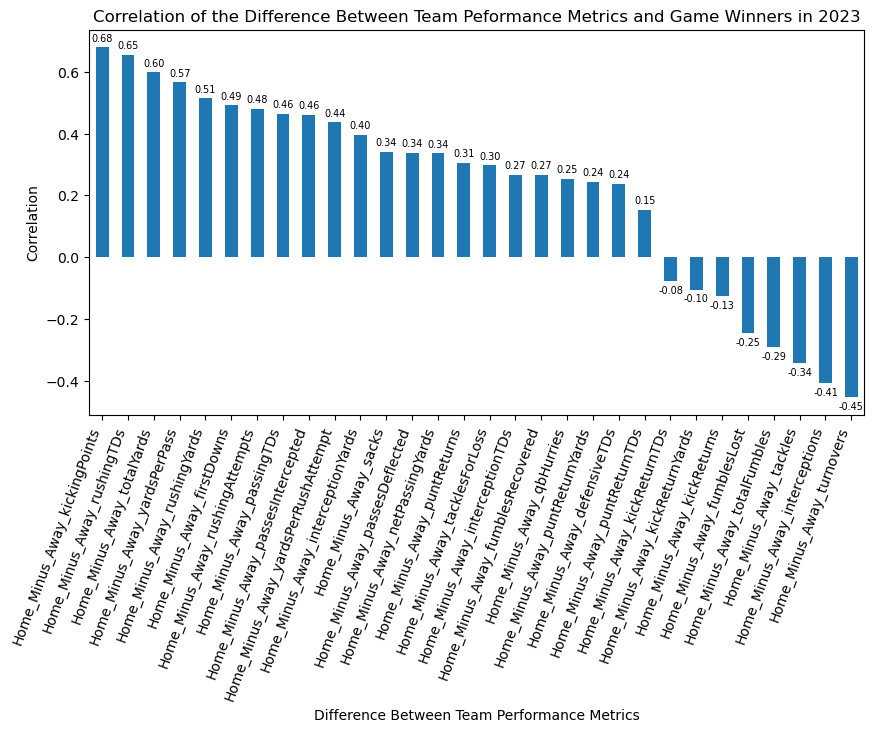

In [91]:
predictors = ['Home_Minus_Away_defensiveTDs',
       'Home_Minus_Away_firstDowns', 'Home_Minus_Away_fumblesLost',
       'Home_Minus_Away_fumblesRecovered', 'Home_Minus_Away_interceptionTDs',
       'Home_Minus_Away_interceptionYards', 'Home_Minus_Away_interceptions',
       'Home_Minus_Away_kickReturnTDs', 'Home_Minus_Away_kickReturnYards',
       'Home_Minus_Away_kickReturns', 'Home_Minus_Away_kickingPoints',
       'Home_Minus_Away_netPassingYards', 'Home_Minus_Away_passesDeflected',
       'Home_Minus_Away_passesIntercepted', 'Home_Minus_Away_passingTDs',
       'Home_Minus_Away_puntReturnTDs', 'Home_Minus_Away_puntReturnYards',
       'Home_Minus_Away_puntReturns', 'Home_Minus_Away_qbHurries',
       'Home_Minus_Away_rushingAttempts', 'Home_Minus_Away_rushingTDs',
       'Home_Minus_Away_rushingYards', 'Home_Minus_Away_sacks',
       'Home_Minus_Away_tackles', 'Home_Minus_Away_tacklesForLoss',
       'Home_Minus_Away_totalFumbles', 'Home_Minus_Away_totalYards',
       'Home_Minus_Away_turnovers', 'Home_Minus_Away_yardsPerPass',
       'Home_Minus_Away_yardsPerRushAttempt']
ax = team_stats_results_big10_2023.select_dtypes(exclude='object').corr()['Home_Team_Win'][predictors].sort_values(ascending=False).plot.bar(x='Predictor', y='Correlation', rot=70, figsize = (10, 5))
plt.xticks(rotation=70, ha='right')
plt.title('Correlation of the Difference Between Team Peformance Metrics and Game Winners in 2023')
plt.xlabel('Difference Between Team Performance Metrics')
plt.ylabel('Correlation')
# for p in ax.patches:
#     ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
for container in ax.containers:
    ax.bar_label(container, fmt= '%.2f', fontsize=7, padding=3)

In [25]:
teams_list = list(pd.unique(team_stats_results_big10_2023[['Home Team','Away Team']].values.ravel('K')))
teams_list

['Minnesota',
 'Michigan State',
 'Purdue',
 'Michigan',
 'Iowa',
 'Maryland',
 'Wisconsin',
 'Indiana',
 'Penn State',
 'Illinois',
 'Rutgers',
 'Kansas',
 'Ohio State',
 'Colorado',
 'Virginia Tech',
 'Northwestern',
 'Iowa State',
 'Washington State',
 'Duke',
 'North Carolina',
 'Nebraska',
 'Notre Dame',
 'Central Michigan',
 'Fresno State',
 'East Carolina',
 'Utah State',
 'Towson',
 'Buffalo',
 'West Virginia',
 'Toledo',
 'Indiana State',
 'Youngstown State',
 'Delaware',
 'UTEP',
 'UNLV',
 'Richmond',
 'Eastern Michigan',
 'Charlotte',
 'Temple',
 'Virginia',
 'Georgia Southern',
 'Louisville',
 'Western Michigan',
 'Western Kentucky',
 'Washington',
 'Northern Illinois',
 'Bowling Green',
 'Syracuse',
 'Louisiana Tech',
 'Florida Atlantic',
 'Akron',
 'Louisiana',
 'Wagner',
 'Howard',
 'UMass']

In [26]:
#shifted_rolling_avg_teamnames = [team.lower().replace(" ","_") + "_shifted_gamestats_2023_rollingavg" for team in teams_list]
shifted_rolling_avg_teamnames = [team.lower().replace(" ","_") for team in teams_list]
shifted_rolling_avg_teamnames

['minnesota',
 'michigan_state',
 'purdue',
 'michigan',
 'iowa',
 'maryland',
 'wisconsin',
 'indiana',
 'penn_state',
 'illinois',
 'rutgers',
 'kansas',
 'ohio_state',
 'colorado',
 'virginia_tech',
 'northwestern',
 'iowa_state',
 'washington_state',
 'duke',
 'north_carolina',
 'nebraska',
 'notre_dame',
 'central_michigan',
 'fresno_state',
 'east_carolina',
 'utah_state',
 'towson',
 'buffalo',
 'west_virginia',
 'toledo',
 'indiana_state',
 'youngstown_state',
 'delaware',
 'utep',
 'unlv',
 'richmond',
 'eastern_michigan',
 'charlotte',
 'temple',
 'virginia',
 'georgia_southern',
 'louisville',
 'western_michigan',
 'western_kentucky',
 'washington',
 'northern_illinois',
 'bowling_green',
 'syracuse',
 'louisiana_tech',
 'florida_atlantic',
 'akron',
 'louisiana',
 'wagner',
 'howard',
 'umass']

In [27]:
##Create shifted rolling averages for just Minnesota as proof of concept

minnesota_games = team_stats_results_big10_2023[(team_stats_results_big10_2023['Home Team'] == 'Minnesota') | (team_stats_results_big10_2023['Away Team'] == 'Minnesota')]
minnesota_game_ids = minnesota_games['Id'].tolist()
print(minnesota_game_ids)

minnesota_home_stats_2023 = home_team_stats_big10_2023[(home_team_stats_big10_2023['Id'].isin(minnesota_game_ids)) & (home_team_stats_big10_2023['Team']=='Minnesota')]

minnesota_away_stats_2023 = away_team_stats_big10_2023[(away_team_stats_big10_2023['Id'].isin(minnesota_game_ids)) & (away_team_stats_big10_2023['Team']=='Minnesota')]

minnesota_allgame_stats_2023 = pd.concat([minnesota_home_stats_2023, minnesota_away_stats_2023], axis=0).sort_values('Id')

minnesota_gamestats_2023_rollingavg = minnesota_allgame_stats_2023.set_index('Id').select_dtypes(exclude='object').expanding().mean().reset_index()
# minnesota_gamestats_2023_rollingavg = minnesota_allgame_stats_2023[['Id']].join(minnesota_allgame_stats_2023.loc[:, minnesota_allgame_stats_2023.columns != 'Id'].select_dtypes(exclude='object').expanding().mean(), how='inner')

shifted_minnesota_gamestats_2023_rollingavg = minnesota_gamestats_2023_rollingavg.set_index('Id').shift(1).reset_index()
shifted_minnesota_gamestats_2023_rollingavg 

[401520148, 401520204, 401520239, 401520264, 401520284, 401520303, 401520338, 401520354, 401520370, 401520395, 401520415, 401520436]


Stat Category,Id,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,kickReturnYards,...,rushingTDs,rushingYards,sacks,tackles,tacklesForLoss,totalFumbles,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401520148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,401520204,0.0,20.000000,0.000000,1.000000,0.0,14.000000,1.000000,0.0,49.000000,...,0.000000,55.000000,3.000000,38.000000,5.000000,0.000000,251.000000,1.000000,4.500000,2.200000
2,401520239,0.0,24.000000,0.500000,0.500000,0.0,16.500000,1.000000,0.0,53.500000,...,1.000000,175.500000,3.500000,31.000000,5.000000,1.000000,332.000000,1.500000,6.150000,3.750000
3,401520264,0.0,22.333333,0.333333,0.333333,0.0,16.666667,1.333333,0.0,53.500000,...,1.000000,173.666667,3.000000,34.000000,5.000000,1.000000,322.333333,1.666667,5.566667,4.333333
4,401520284,0.0,20.500000,0.250000,0.500000,0.0,16.666667,1.000000,0.0,42.333333,...,1.250000,191.250000,3.000000,34.000000,5.000000,0.666667,341.000000,1.250000,6.200000,4.700000
5,401520303,0.0,21.600000,0.200000,0.400000,0.0,12.500000,1.000000,0.0,32.500000,...,1.600000,193.200000,2.250000,31.250000,4.000000,0.750000,342.200000,1.200000,7.040000,4.540000
6,401520338,0.0,19.666667,0.166667,0.333333,0.0,12.500000,1.166667,0.0,26.800000,...,1.333333,180.500000,1.800000,31.400000,3.800000,0.750000,313.333333,1.333333,6.416667,4.283333
7,401520354,0.0,18.571429,0.142857,0.571429,0.0,10.200000,1.000000,0.0,25.833333,...,1.142857,170.857143,2.166667,31.166667,4.166667,0.600000,302.714286,1.142857,6.214286,4.028571
8,401520370,0.0,19.250000,0.375000,0.625000,0.0,10.333333,1.000000,0.0,25.833333,...,1.250000,174.500000,2.000000,30.428571,4.000000,0.833333,314.875000,1.375000,6.575000,4.025000
9,401520395,0.0,18.888889,0.444444,0.777778,0.0,8.857143,0.888889,0.0,24.857143,...,1.111111,165.444444,2.375000,32.250000,4.625000,0.857143,308.777778,1.333333,6.688889,3.877778


In [28]:
#Create shifted rolling averages for all teams
shifted_avg_stats_dfs_2023 = {}
for team in teams_list:
    team_games = team_stats_results_big10_2023[(team_stats_results_big10_2023['Home Team'] == team) | (team_stats_results_big10_2023['Away Team'] == team)]
    team_game_ids = team_games['Id'].tolist()
    team_home_stats_2023 = home_team_stats_big10_2023[(home_team_stats_big10_2023['Id'].isin(team_game_ids)) & (home_team_stats_big10_2023['Team']==team)]
    team_away_stats_2023 = away_team_stats_big10_2023[(away_team_stats_big10_2023['Id'].isin(team_game_ids)) & (away_team_stats_big10_2023['Team']==team)]
    team_allgame_stats_2023 = pd.concat([team_home_stats_2023, team_away_stats_2023], axis=0).sort_values('Id')
    team_gamestats_2023_rollingavg = team_allgame_stats_2023.set_index('Id').select_dtypes(exclude='object').expanding().mean().reset_index()
    shifted_team_gamestats_2023_rollingavg = team_gamestats_2023_rollingavg.set_index('Id').shift(1)#.reset_index()
    shifted_avg_stats_dfs_2023[team] = shifted_team_gamestats_2023_rollingavg
shifted_avg_stats_dfs_2023['Ohio State']
home_stats_list = shifted_avg_stats_dfs_2023['Ohio State'].add_prefix('Home_').add_suffix("_season_avg").copy().columns
away_stats_list = shifted_avg_stats_dfs_2023['Ohio State'].add_prefix('Away_').add_suffix("_season_avg").copy().columns
home_minus_away_stats_list = shifted_avg_stats_dfs_2023['Ohio State'].add_prefix('Home_Minus_Away_').add_suffix("_season_avg").copy().columns
# .drop(columns=['Id'])
shifted_avg_stats_dfs_2023['Ohio State']
#away_stats_list

Stat Category,defensiveTDs,firstDowns,fumblesLost,fumblesRecovered,interceptionTDs,interceptionYards,interceptions,kickReturnTDs,kickReturnYards,kickReturns,...,rushingTDs,rushingYards,sacks,tackles,tacklesForLoss,totalFumbles,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
Id,,,,,,,,,,,,,,,,,,,,,
401520156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401520208,0.000000,22.000000,0.000000,0.000000,NaN,NaN,1.000000,0.0,23.000000,1.000000,...,2.000000,143.000000,1.000000,34.000000,6.000000,NaN,380.000000,1.000000,6.600000,4.600000
401520240,0.000000,22.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,31.500000,1.500000,...,2.000000,133.000000,1.500000,35.000000,4.500000,1.000000,431.000000,0.500000,8.750000,4.600000
401520307,0.333333,23.000000,0.333333,0.666667,0.500000,29.000000,0.666667,0.0,34.333333,1.666667,...,2.333333,156.666667,1.666667,36.000000,5.666667,1.500000,474.666667,1.000000,10.266667,5.133333
401520323,0.500000,22.000000,0.250000,0.500000,0.666667,32.333333,0.500000,0.0,31.750000,1.500000,...,2.000000,133.000000,1.750000,36.000000,5.500000,1.500000,451.500000,0.750000,10.450000,4.325000
401520343,0.400000,22.400000,0.600000,0.400000,0.666667,32.333333,0.400000,0.0,35.200000,1.600000,...,2.000000,136.800000,2.000000,35.800000,6.200000,1.666667,458.400000,1.000000,10.580000,4.240000
401520360,0.333333,22.333333,0.666667,0.333333,0.666667,32.333333,0.333333,0.0,31.666667,1.500000,...,1.833333,127.166667,2.333333,35.000000,6.166667,1.500000,442.833333,1.000000,10.183333,3.850000
401520375,0.285714,22.428571,0.714286,0.428571,0.666667,32.333333,0.571429,0.0,31.666667,1.500000,...,1.714286,134.857143,2.285714,33.857143,5.857143,1.400000,437.714286,1.285714,9.971429,3.900000
401520393,0.375000,21.500000,0.625000,0.375000,0.750000,47.500000,0.625000,0.0,26.428571,1.428571,...,1.625000,135.375000,2.125000,32.250000,5.625000,1.400000,424.000000,1.250000,9.637500,4.012500


In [29]:
#team_stats_results_big10_2023[team_stats_results_big10_2023['Home Team'] == "Ohio State"][home_stats_list]

In [30]:
#Initialize new home and away columns for season rolling averages of calculated stats
for home_stats in home_stats_list:
    team_stats_results_big10_2023[home_stats] = pd.Series(dtype='int')
for away_stats in away_stats_list:
    team_stats_results_big10_2023[away_stats] = pd.Series(dtype='int')

team_stats_results_big10_2023=team_stats_results_big10_2023.set_index('Id')
#Add rolling averages to the team_stats_results dataframe
for team_stats in shifted_avg_stats_dfs_2023:
    team_stats_results_big10_2023.update(shifted_avg_stats_dfs_2023[team_stats].add_prefix('Home_').add_suffix("_season_avg").loc[team_stats_results_big10_2023[team_stats_results_big10_2023['Home Team'] == team_stats].index, :])
    team_stats_results_big10_2023.update(shifted_avg_stats_dfs_2023[team_stats].add_prefix('Away_').add_suffix("_season_avg").loc[team_stats_results_big10_2023[team_stats_results_big10_2023['Away Team'] == team_stats].index, :])

team_stats_results_big10_2023 = team_stats_results_big10_2023.reset_index()

for count, col in enumerate(home_minus_away_stats_list):
    team_stats_results_big10_2023[col] = team_stats_results_big10_2023[home_stats_list[count]].subtract(team_stats_results_big10_2023[away_stats_list[count]]).copy()

team_stats_results_big10_2023.head().iloc[:,100:]

,Home_yardsPerPass_season_avg,Home_yardsPerRushAttempt_season_avg,Away_defensiveTDs_season_avg,Away_firstDowns_season_avg,Away_fumblesLost_season_avg,Away_fumblesRecovered_season_avg,Away_interceptionTDs_season_avg,Away_interceptionYards_season_avg,Away_interceptions_season_avg,Away_kickReturnTDs_season_avg,...,Home_Minus_Away_rushingTDs_season_avg,Home_Minus_Away_rushingYards_season_avg,Home_Minus_Away_sacks_season_avg,Home_Minus_Away_tackles_season_avg,Home_Minus_Away_tacklesForLoss_season_avg,Home_Minus_Away_totalFumbles_season_avg,Home_Minus_Away_totalYards_season_avg,Home_Minus_Away_turnovers_season_avg,Home_Minus_Away_yardsPerPass_season_avg,Home_Minus_Away_yardsPerRushAttempt_season_avg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
###Note: These are other things that were attempted in the for team_stats in shifted_avg_stats_dfs_2023 loop 
###These notes are in case some error is found later and debugging is needed

#team_stats_results_big10_2023=team_stats_results_big10_2023.set_index('Id')
#for team_stats in shifted_avg_stats_dfs_2023:
    #team_stats_results_big10_2023[home_stats_list] = np.where(team_stats_results_big10_2023['Home Team'].iloc[list(shifted_avg_stats_dfs_2023[team_stats].index)] == team_stats, shifted_avg_stats_dfs_2023[team_stats], team_stats_results_big10_2023[home_stats_list].iloc[list(shifted_avg_stats_dfs_2023[team_stats].index)])
    #print(shifted_avg_stats_dfs_2023[team_stats].add_prefix('Home_').add_suffix("_season_avg"))
    #print(team_stats_results_big10_2023[team_stats_results_big10_2023['Home Team'] == team_stats][home_stats_list])
    #probably should be filter instead of if
    #df.loc[team_stats_results_big10_2023[team_stats_results_big10_2023['Home Team'] == team_stats].index, :] = shifted_avg_stats_dfs_2023[team_stats].add_prefix('Home_').add_suffix("_season_avg").loc[team_stats_results_big10_2023[team_stats_results_big10_2023['Home Team'] == team_stats].index, :]
    #this_team_home_stats = shifted_avg_stats_dfs_2023[team_stats].add_prefix('Home_').add_suffix("_season_avg")
    #team_stats_results_big10_2023[team_stats_results_big10_2023['Home Team'] == team_stats] = shifted_avg_stats_dfs_2023[team_stats].add_prefix('Home_').add_suffix("_season_avg")
    #for row in team_stats_results_big10_2023.itertuples(index=False):
        #if (team_stats_results_big10_2023['Id'] == team_stats['Id']) & (team_stats_results_big10_2023['Home Team'] == team_stats):
        #if (row['Id'] == team_stats['Id']) & (row['Home Team'] == team_stats):
        #    row[home_stats] = 
##NEED JOIN
    #if (team_stats_results_big10_2023['Id'] == team_stats['Id']) & (team_stats_results_big10_2023['Away Team'] == team_stats):
##NEED ANOTHER JOIN

In [32]:
team_stats_results_big10_2023.tail(50).iloc[:,70:]

,Home_Minus_Away_yardsPerPass,Home_Minus_Away_yardsPerRushAttempt,Home_defensiveTDs_season_avg,Home_firstDowns_season_avg,Home_fumblesLost_season_avg,Home_fumblesRecovered_season_avg,Home_interceptionTDs_season_avg,Home_interceptionYards_season_avg,Home_interceptions_season_avg,Home_kickReturnTDs_season_avg,...,Home_Minus_Away_rushingTDs_season_avg,Home_Minus_Away_rushingYards_season_avg,Home_Minus_Away_sacks_season_avg,Home_Minus_Away_tackles_season_avg,Home_Minus_Away_tacklesForLoss_season_avg,Home_Minus_Away_totalFumbles_season_avg,Home_Minus_Away_totalYards_season_avg,Home_Minus_Away_turnovers_season_avg,Home_Minus_Away_yardsPerPass_season_avg,Home_Minus_Away_yardsPerRushAttempt_season_avg
56,-0.9,1.7,0.000000,21.250000,0.750000,0.500000,0.000000,23.500000,0.750000,0.000000,...,0.500000,6.350000,0.000000,14.600000,2.150000,0.333333,80.900000,0.900000,0.050000,0.485000
57,1.7,-0.6,0.000000,17.200000,0.200000,0.400000,0.000000,28.000000,0.800000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,-1.0,2.8,0.400000,12.800000,1.000000,0.400000,0.333333,10.000000,0.800000,0.000000,...,-1.400000,-43.200000,-2.400000,-2.400000,-1.800000,-0.250000,-158.200000,0.200000,-2.080000,-0.960000
59,-7.2,-2.8,0.000000,21.600000,0.200000,0.400000,0.000000,12.500000,1.000000,0.000000,...,-0.600000,9.200000,-0.150000,4.650000,-2.200000,-0.583333,-69.200000,0.200000,-2.860000,-0.400000
60,1.9,0.4,0.000000,18.000000,0.333333,0.500000,0.000000,13.000000,0.333333,0.000000,...,1.300000,53.500000,0.633333,0.033333,-1.700000,-1.500000,-36.733333,-1.733333,-0.956667,0.713333
61,6.3,1.1,0.500000,21.333333,0.166667,0.166667,0.600000,30.000000,0.666667,0.000000,...,1.100000,74.966667,0.533333,-9.566667,1.133333,-0.166667,80.633333,-0.166667,3.100000,2.043333
62,-7.3,-0.4,0.166667,23.166667,0.833333,0.166667,0.000000,9.400000,0.833333,0.333333,...,0.166667,8.166667,0.916667,5.166667,0.833333,1.100000,-61.833333,0.916667,-3.350000,-0.508333
63,-0.2,-0.2,0.166667,22.166667,0.000000,0.666667,0.000000,14.000000,0.833333,0.200000,...,0.833333,24.500000,1.333333,-2.500000,1.166667,-0.600000,52.000000,-1.333333,0.683333,0.933333
64,5.0,5.0,0.200000,25.400000,0.200000,1.200000,0.333333,33.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2.0,-0.5,0.200000,21.600000,1.000000,0.400000,0.333333,47.333333,0.600000,0.000000,...,2.000000,84.666667,1.100000,-1.666667,-0.200000,-0.950000,164.433333,-0.066667,1.300000,1.616667


In [33]:
logreg = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(penalty = 'l1', solver='liblinear'))
])

In [34]:
#variables = 
team_stats_results_big10_2023_droppedna = team_stats_results_big10_2023.dropna(subset=home_minus_away_stats_list)

X = team_stats_results_big10_2023_droppedna[home_minus_away_stats_list]
y = team_stats_results_big10_2023_droppedna['Home_Team_Win']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [35]:
len(y)

59

In [36]:
logreg = LogisticRegression().fit(X_train, y_train)
logreg.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([False, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False])

In [37]:
y_test

103    False
70      True
67      True
66     False
89     False
82     False
45      True
102    False
101     True
44      True
83      True
65     False
74      True
95      True
105    False
Name: Home_Team_Win, dtype: bool

In [94]:
print(f'The accuracy score is: {accuracy_score(y_test, logreg.predict(X_test))}' )
print(classification_report(y_test, logreg.predict(X_test)))
print(confusion_matrix(y_test, logreg.predict(X_test)))

The accuracy score is: 0.7333333333333333
              precision    recall  f1-score   support

       False       0.80      0.57      0.67         7
        True       0.70      0.88      0.78         8

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15

[[4 3]
 [1 7]]


In [39]:
logreg.predict_proba(X_test)

array([[5.07397733e-01, 4.92602267e-01],
       [9.20725748e-01, 7.92742518e-02],
       [1.29058549e-01, 8.70941451e-01],
       [5.79175155e-01, 4.20824845e-01],
       [1.04916741e-01, 8.95083259e-01],
       [2.86562737e-01, 7.13437263e-01],
       [1.11056850e-02, 9.88894315e-01],
       [7.63453671e-01, 2.36546329e-01],
       [1.85673919e-01, 8.14326081e-01],
       [2.33928195e-03, 9.97660718e-01],
       [8.63106926e-04, 9.99136893e-01],
       [6.97205094e-02, 9.30279491e-01],
       [3.93687371e-01, 6.06312629e-01],
       [3.53916611e-01, 6.46083389e-01],
       [9.92889055e-01, 7.11094538e-03]])

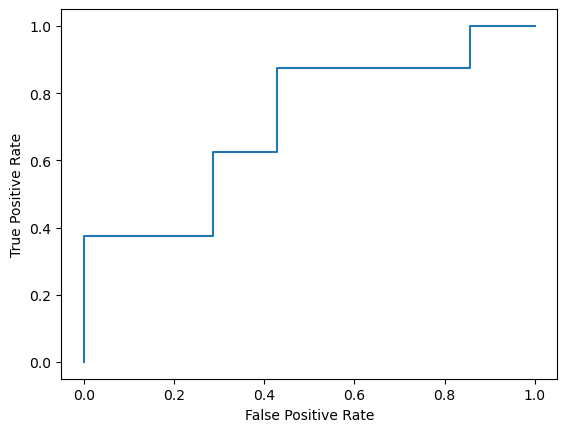

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [41]:
rf = RandomForestClassifier(max_depth=5)
#Explore max_depth, learning rate, number of trees

In [42]:
rf.fit(X_train, y_train)
rf.predict(X_test)

array([ True, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False])

In [43]:
print(accuracy_score(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))

0.6666666666666666
              precision    recall  f1-score   support

       False       0.75      0.43      0.55         7
        True       0.64      0.88      0.74         8

    accuracy                           0.67        15
   macro avg       0.69      0.65      0.64        15
weighted avg       0.69      0.67      0.65        15

[[3 4]
 [1 7]]


In [44]:
importances = pd.DataFrame({
    'variable': home_minus_away_stats_list,
    'importance': rf.feature_importances_
})

importances.sort_values('importance', ascending = False)

,variable,importance
0,Home_Minus_Away_defensiveTDs_season_avg,0.119828
4,Home_Minus_Away_interceptionTDs_season_avg,0.102448
5,Home_Minus_Away_interceptionYards_season_avg,0.089372
10,Home_Minus_Away_kickingPoints_season_avg,0.046023
19,Home_Minus_Away_rushingAttempts_season_avg,0.042145
2,Home_Minus_Away_fumblesLost_season_avg,0.040101
20,Home_Minus_Away_rushingTDs_season_avg,0.038474
28,Home_Minus_Away_yardsPerPass_season_avg,0.038439
9,Home_Minus_Away_kickReturns_season_avg,0.036946
26,Home_Minus_Away_totalYards_season_avg,0.036636
